# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data


In [87]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = './TrafficSigns/train.p'
testing_file = './TrafficSigns/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
        
X_train, y_train = train['features'], train['labels']
X_test,   y_test =  test['features'],  test['labels']

# Debug info
print()
print("(debug) Size of Training & Validation data:",len(X_train))
print("(debug) Size of Test data:                 ",len(X_test))


(debug) Size of Training & Validation data: 39209
(debug) Size of Test data:                  12630


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

#### A) Size & shape analysis of given dataset and generation for validation-set
The validation-set is splitted from the original trainings-set by 20%.

In [88]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np
from sklearn.model_selection import train_test_split

# Get randomized datasets for training and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,test_size=0.2,random_state=0)

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_validation)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

# print
print()
print("Number of training examples   =", n_train)
print("number of validation examples =", n_validation)
print("Number of testing examples    =", n_test)
print("Image data shape              =", image_shape)
print("Number of classes             =", n_classes)


Number of training examples   = 31367
number of validation examples = 7842
Number of testing examples    = 12630
Image data shape              = (32, 32, 3)
Number of classes             = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### B) Analysis of the distribution of the training-set, validation-set and test-set


Data distributions of training, validation and test sets



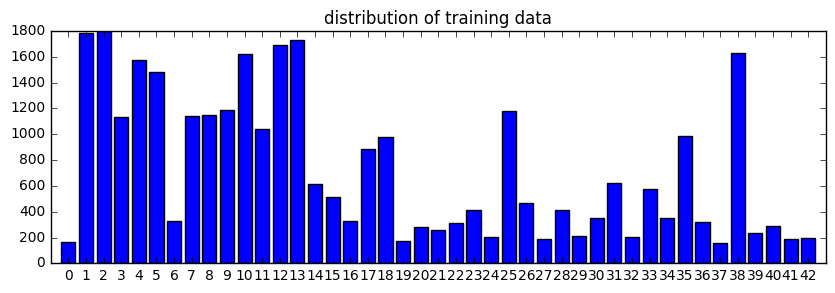

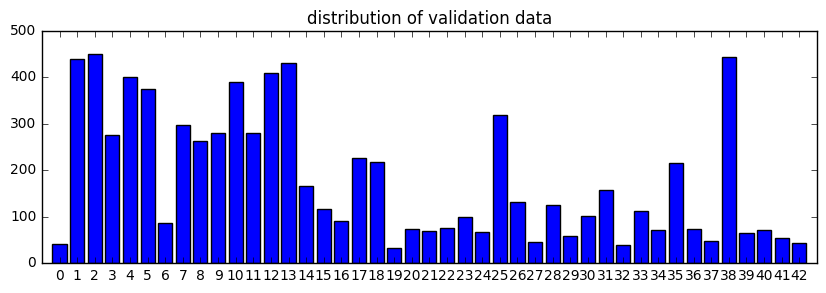

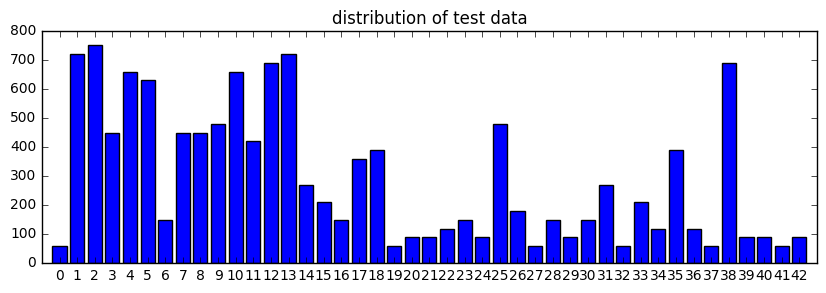

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

print ()
print ("Data distributions of training, validation and test sets")
print ()

# Show distribrution of training data
data, number = np.unique(y_train,return_counts=True)
plt.rcParams["figure.figsize"] = [10, 3]
axes = plt.gca()
axes.set_xlim([-1,n_classes])
plt.bar(data, number, tick_label=data, width=0.8, align='center')
plt.title('distribution of training data')
plt.show()

# Show distribution of validation data
data, number = np.unique(y_validation,return_counts=True)
plt.rcParams["figure.figsize"] = [10, 3]
axes = plt.gca()
axes.set_xlim([-1,n_classes])
plt.bar(data, number, tick_label=data, width=0.8, align='center')
plt.title('distribution of validation data')
plt.show()

# Show distribution of test data
data, number = np.unique(y_test,return_counts=True)
plt.rcParams["figure.figsize"] = [10, 3]
axes = plt.gca()
axes.set_xlim([-1,n_classes])
plt.bar(data, number, tick_label=data, width=0.8, align='center')
plt.title('distribution of test data')
plt.show()

#### C) Visualization of training-set images


Display 4 random training pics examples (title represents the class id)


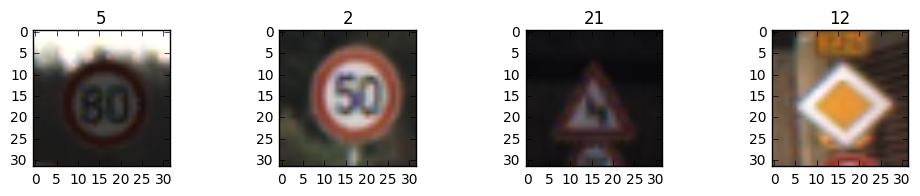

In [90]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Print 4 random pics of training data
print ()
print ('Display 4 random training pics examples (title represents the class id)')

# Save random numbers & pics for further steps
pic = np.zeros(4,dtype=int)
plt.figure(figsize=(10, 7))

# Plot images
for i in range(4) :
    pic[i] = random.randint(0, len(X_train))
    image = X_train[pic[i]]
    plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(y_train[pic[i]])
    
plt.tight_layout()
plt.show()

# Save pic random numbers
pic_save = np.array(pic,dtype=int)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### A) Preprossing functions: normalize_input, processRGBpics
* func. normalize_input, normalizes input image data by pixel - 128)/ 128 => [-1,+1] normalization
* func. processRGBpics, converts color images to grayscale ones and performs a image/pixel normalization (see above)

In [91]:
# Normalize function    
def normalize_input(image) :
    return (image-128.0)/128

# ProcessRGBpics function coverts to grayscale and normalizes the image (-1,1) style by (pixel - 128)/ 128 
def processRGBpics(x):
    output = np.average(x, axis=3)
    output = np.expand_dims(output, axis=3)
    output =  normalize_input(output)
    return output

#### B) Pre-processing of training-set, validation-set and test-set data

In [92]:
# Process training, validation and test data (grayscale + normalization)
x_training   = processRGBpics(X_train)
x_validation = processRGBpics(X_validation)
x_test       = processRGBpics(X_test)


#### C) Visualization of pre-processed training-set images


Display the 4 random training pics examples from before - processed (title represents the class id)


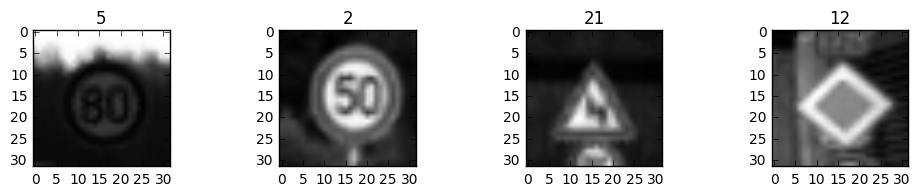

In [93]:
# Plot the processed pics
print ()
print ('Display the 4 random training pics examples from before - processed (title represents the class id)')

plt.figure(figsize=(10, 7))

# Plot processed images
for i in range(len(pic_save)) :
    image = np.reshape(x_training[pic_save[i]],(32,32))
    plt.subplot(4,4,i+1)
    plt.imshow(image,cmap = plt.get_cmap('gray'))
    plt.title(y_train[pic_save[i]])

plt.tight_layout()
plt.show()   

#### D) Augmentation - Fake Image Generation
In order to increase the training-set random images are generated fromm the original training set.
The following random actions are performed on the orignal images in order to create a "fake/new" image:
1. width & height movements by +/-10%
2. rotation +/-15 degrees
3. zoom out/in by 90%/110%

The ImageDataGenerator from the keras enviroment is used to create the fake images.

In [94]:
import keras
from keras.preprocessing.image import ImageDataGenerator

# Setup image manipultion generator from keras
datagen = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.11, height_shift_range = 0.11, zoom_range = 0.2)

# Size of fake data
BATCH     = 1000                    # batch size generator
RUN       = 3                       # number of runs
EXIT      = int(len(y_train)/BATCH) # exit loops criteria

x_fake =np.zeros((BATCH*EXIT*RUN,32,32,3))
y_fake =np.zeros(BATCH*EXIT*RUN,dtype=np.int)

print ("(debug) Fake images generation started")

for u in range (RUN):
    i = 0
    k = u * EXIT * BATCH
    print ('(debug) loop',u,'of',BATCH*EXIT,'runs ...')
    datagen = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.10, height_shift_range = 0.10, zoom_range = 0.2)
    for x_, y_ in datagen.flow(X_train, y_train, batch_size = BATCH):
        start = k + i * BATCH
        end   = start + BATCH 
        y_fake[start:end] = np.copy(y_)
        x_fake[start:end] = np.copy(x_) 

        i = i + 1
        if (i>EXIT-1) :
            break
    
                   
print ("(debug) Fake images generated !")

(debug) Fake images generation started
(debug) loop 0 of 31000 runs ...
(debug) loop 1 of 31000 runs ...
(debug) loop 2 of 31000 runs ...
(debug) Fake images generated !


#### D1) Visualization of generated fake images


Display the 4 random fake pics examples (title represents the class id)


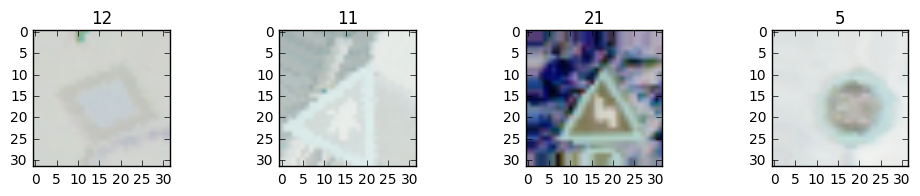

In [95]:
# Plot 4 random fake images
print ()
print ('Display the 4 random fake pics examples (title represents the class id)')


# Save random numbers & pics for further steps
pic_f = np.zeros(4,dtype=int)
plt.figure(figsize=(10, 7))

# Plot images
for i in range(4) :
    pic_f[i] = random.randint(0, len(x_fake))
    image = x_fake[pic_f[i]]
    plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(y_fake[pic_f[i]])
    
plt.tight_layout()
plt.show()

# Save pic random numbers
pic_f_save = np.array(pic_f,dtype=int)

#### D2) Pre-process augmented images

In [96]:
# Process fake image data (grayscale + normalization)

x_training_f   = processRGBpics(x_fake)


#### D3) Visualization of pre-processed augmented images


Display the 4 random fake pics examples from before - processed (title represents the class id)


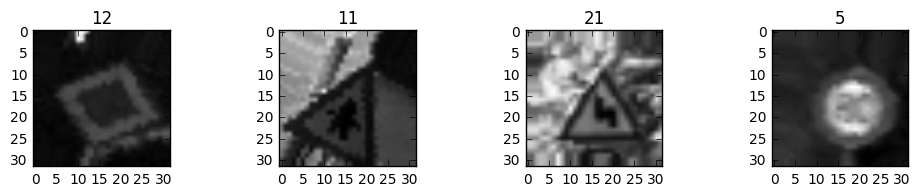

In [97]:
# Plot the processed pics
print ()
print ('Display the 4 random fake pics examples from before - processed (title represents the class id)')

plt.figure(figsize=(10, 7))

# Plot processed images
for i in range(len(pic_f_save)) :
    image = np.reshape(x_training_f[pic_f_save[i]],(32,32))
    plt.subplot(4,4,i+1)
    plt.imshow(image,cmap = plt.get_cmap('gray'))
    plt.title(y_fake[pic_f_save[i]])

plt.tight_layout()
plt.show()   

#### D5) Add the augmented images to the training-set

In [98]:
# Join fake data to training data (training data = orginal data + fake data)
print ()
print ('(debug) Adding fake data with size =',len(y_fake),'to training data with size=',len(y_train))
print ('(debug) New training set size =',(len(y_fake)+len(y_train))  )
print ()

x_training = np.concatenate((x_training, x_training_f))
y_train    = np.concatenate((y_train, y_fake))


(debug) Adding fake data with size = 93000 to training data with size= 31367
(debug) New training set size = 124367



#### D6) Analysis of the distribution of the training-set after adding augmented images


Data distributions of training after joining in fake data



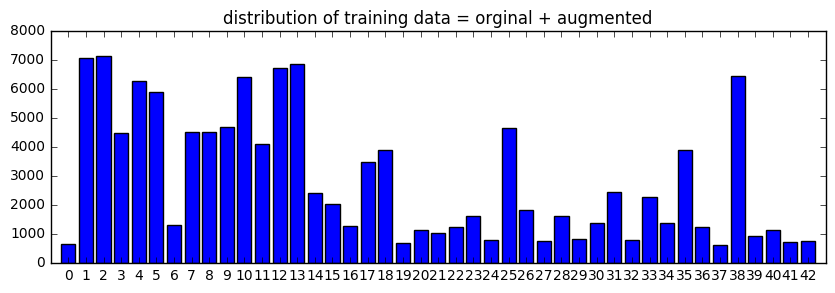

In [99]:
# Display distribution of new data
print ()
print ("Data distributions of training after joining in fake data")
print ()

data, number = np.unique(y_train,return_counts=True)
plt.rcParams["figure.figsize"] = [10, 3]
axes = plt.gca()
axes.set_xlim([-1,n_classes])
plt.bar(data, number, tick_label=data, width=0.8, align='center')
plt.title('distribution of training data = orginal + augmented')
plt.show()


#### D7) Model Architecture based on LeNet architecture

In [115]:
from sklearn.utils import shuffle
# shuffle training data
x_training, y_train = shuffle(x_training, y_train)

#### D7.1) Model functions & Parameters

In [116]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten


# training parameters global
EPOCHS = 90
BATCH_SIZE = 128

# Random variables
mu = 0
sigma = 0.1


def conv1_activation(x) :

    #SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x15.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 15), mean = mu, stddev = sigma), name = 'conv1_W')
    conv1_b = tf.Variable(tf.zeros(15), name = 'conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)    
    return conv1


def conv1_subsample(x) :

    # SOLUTION: Pooling. Input = 30x30x15. Output = 15x15x15
    conv1 = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    return conv1


def conv2_activation(x):

    # SOLUTION: Layer 2: Convolutional. Output = 11x11x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 15, 16), mean = mu, stddev = sigma),name = 'conv2_W')
    conv2_b = tf.Variable(tf.zeros(16), name = 'conv2_b')
    conv2   = tf.nn.conv2d(x, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    return conv2


def conv2_subsample(x):
    
    # SOLUTION: Pooling. Input = 11x11x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    return conv2


def fc0_conv1_subsample(x):

    # SOLUTION: Pooling. Input = 15x15x15. Output = 7x7x15
    sub1   = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID') 
    return sub1


def fc0_net(x,y):

    fc0   = tf.concat([flatten(y),flatten(x)],1)
    return fc0


def fc1_net(x):

    # SOLUTION: Layer 3: Fully Connected. Input = 400 + 735 = 1135. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1135, 120), mean = mu, stddev = sigma), name = 'fc1_W')#
    fc1_b = tf.Variable(tf.zeros(120), name = 'fc1_b')
    fc1   = tf.matmul(x, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    return fc1


def fc2_net(x):

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name = 'fc2_W')
    fc2_b  = tf.Variable(tf.zeros(84), name = 'fc2_b')
    fc2    = tf.matmul(x, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    return fc2


def LeNet(x):    

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma), name = 'fc3_W')
    fc3_b  = tf.Variable(tf.zeros(43), name = 'fc3_b')
    logits = tf.matmul(x, fc3_W) + fc3_b    
    return logits





A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### D8) Model Intantiation

In [117]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))  # color map
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)                      # 43 feautres


rate = 0.001

# model network
conv1_act       = conv1_activation(x)
conv1_sub       = conv1_subsample(conv1_act)
conv2_act       = conv2_activation(conv1_sub)
conv2_sub       = conv2_subsample(conv2_act)
fc0_conv1_sub   = fc0_conv1_subsample(conv1_sub)
fc0             = fc0_net(fc0_conv1_sub,conv2_sub) 
fc1             = fc1_net(fc0)
fc2             = fc2_net(fc1)
logits          = LeNet(fc2)


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


# evaluate
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### D9) Mode Saver & Evaluation function

In [118]:
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session() 
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### D10) Train model

In [119]:
from datetime import datetime

# run session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_training) # independent 
    v_accuracy = np.zeros(EPOCHS)
    v_training = np.zeros(EPOCHS)
    
    print("Training...")
    print()
    
    start_time = datetime.now() # start timer 
    
    for i in range(EPOCHS):
        x_training, y_train = shuffle(x_training, y_train)
                
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_training[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate (x_training, y_train)
        v_training[i] = training_accuracy
        
        validation_accuracy = evaluate(x_validation, y_validation)
        v_accuracy[i] = validation_accuracy    
                
        print("EPOCH {} ...".format(i+1))
        print("Training   Accuracy = {:.3f}".format(training_accuracy))   # this is perf. inefficient
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
      
        v_test = evaluate (x_test, y_test)
        
    print("Test       Accuracy = {:.3f}".format(v_test))
    
    saver.save(sess, './aug-custom-lenet')
    
    print("Run time =",datetime.now()-start_time) # performance
    print()
    
    print("Model saved")

Training...

EPOCH 1 ...
Training   Accuracy = 0.697
Validation Accuracy = 0.849

EPOCH 2 ...
Training   Accuracy = 0.811
Validation Accuracy = 0.930

EPOCH 3 ...
Training   Accuracy = 0.852
Validation Accuracy = 0.954

EPOCH 4 ...
Training   Accuracy = 0.895
Validation Accuracy = 0.974

EPOCH 5 ...
Training   Accuracy = 0.910
Validation Accuracy = 0.978

EPOCH 6 ...
Training   Accuracy = 0.927
Validation Accuracy = 0.975

EPOCH 7 ...
Training   Accuracy = 0.933
Validation Accuracy = 0.982

EPOCH 8 ...
Training   Accuracy = 0.939
Validation Accuracy = 0.983

EPOCH 9 ...
Training   Accuracy = 0.949
Validation Accuracy = 0.983

EPOCH 10 ...
Training   Accuracy = 0.955
Validation Accuracy = 0.985

EPOCH 11 ...
Training   Accuracy = 0.960
Validation Accuracy = 0.988

EPOCH 12 ...
Training   Accuracy = 0.953
Validation Accuracy = 0.985

EPOCH 13 ...
Training   Accuracy = 0.967
Validation Accuracy = 0.989

EPOCH 14 ...
Training   Accuracy = 0.966
Validation Accuracy = 0.989

EPOCH 15 ...
Tra

### Train, Validate and Test the Model

### Include an exploratory visualization of the dataset

#### A) Visualization of trainings and validation accuracy vs. number of epchos 

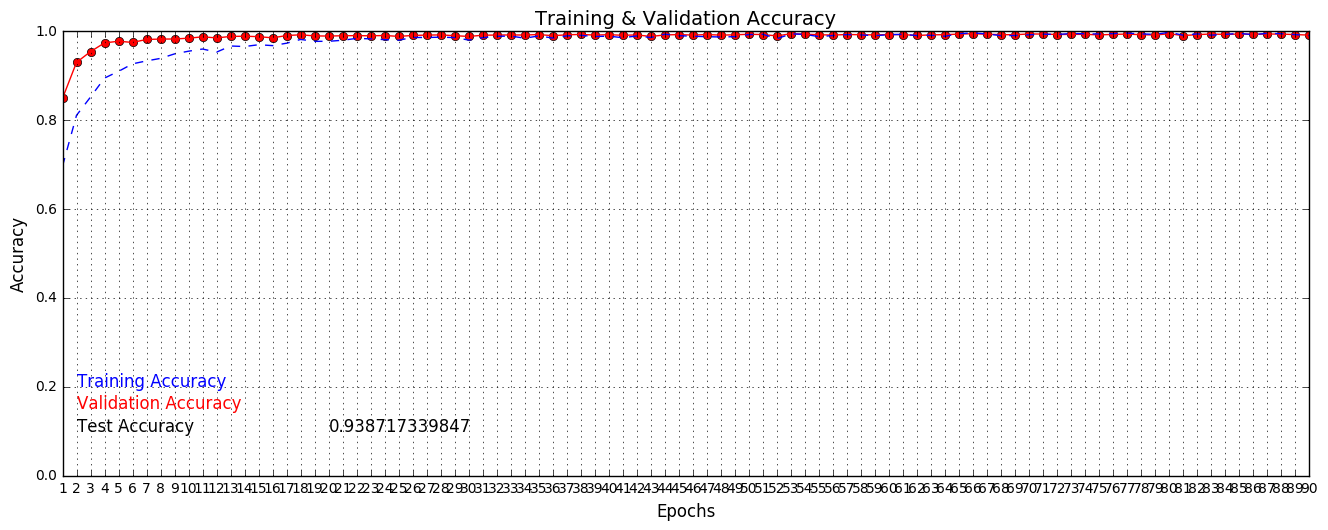

In [120]:
# Plot accuracies
plt.figure(figsize=(26, 10))
plt.subplot(221)
plt.title('Training & Validation Accuracy',fontsize=14)
    
plt.plot(range(1,EPOCHS+1),(v_accuracy),  'ro')
plt.plot(range(1,EPOCHS+1),(v_accuracy),  'r-')
plt.plot(range(1,EPOCHS+1),(v_training),  'b--')
    
#plt.text(1,3,'Validation Accuracy',color='red',fontsize=8)
    
plt.axis([1, EPOCHS, 0, 1.0])
plt.xticks(np.arange(1, EPOCHS+1, 1))
plt.grid()
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.text(2,0.2,'Training Accuracy',color='blue',fontsize=12)
plt.text(2,0.15,'Validation Accuracy',color='red',fontsize=12)
plt.text(2,0.1,'Test Accuracy',color='black',fontsize=12)
plt.text(20,0.1,v_test,color='black',fontsize=12)
plt.tight_layout()
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

#### A) Helper array to map class label type ID to traffic signs names 

In [121]:
### Traffic Sign Nsme Mapping function
import numpy as np

with open('signnames.csv') as f:
    content = f.read().splitlines()

sign_names = []
# Map to array
for i in range (1,len(content),1) :
    name = content[i].split(',')
    sign_names.append(name[1])

#### B) Load 16 traffic sign images from the WWW and visualize these
The file name of each image codes the traffic sign class label inside the name: sign_[name].[class type ID].jpg


(debug) 16 traffic sign images from the WWW



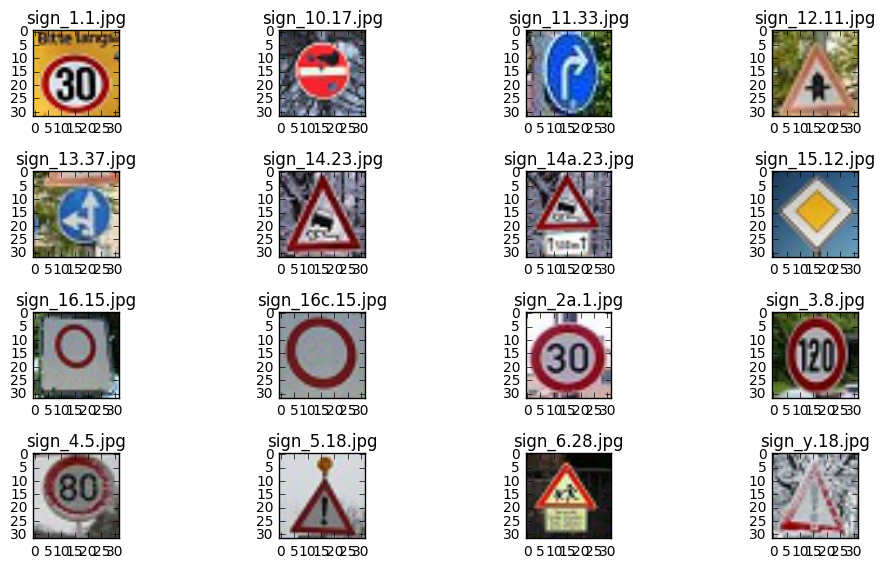

In [122]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# pics location
location = "test_examples.new.good/"
test_dir = os.listdir(location)

pic_features  = []
pic_labels    = []


# plot pics
plt.figure(figsize=(10, 7))

i = 0
for pics in test_dir :
    # read image file
    fname  = location + pics
    image = mpimg.imread(fname)
    name  = pics.split('.')
    # build list   
    pic_features.append(image)
    pic_labels.append(name[1])
    # print 
    #print (pics.shape)
    #print (pics)
    # show
    sub = plt.subplot(5,4,i+1)
    plt.imshow(image)
    plt.title(pics)
    i = i + 1
    
        
print ()
print ("(debug)",i, "traffic sign images from the WWW")
print ()
    
    
plt.tight_layout()
plt.show()

# pre-process pics for prediction
newfeatures   = processRGBpics(np.array(pic_features))
newlabels     = np.array(pic_labels,dtype=np.int)

### Predict the Sign Type for Each Image

#### C) Predict & visualize sign type prediction for each image (including indirect performance analysis)


Sample pics prediction (right pic = original, left pic = used inside model

  SIGN: Speed limit (30km/h)  PREDICTION: Speed limit (20km/h)


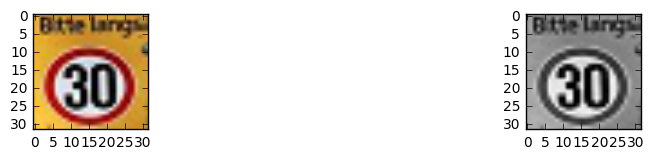

  SIGN: No entry  PREDICTION: No entry


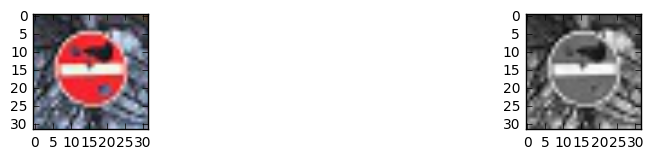

  SIGN: Turn right ahead  PREDICTION: Turn right ahead


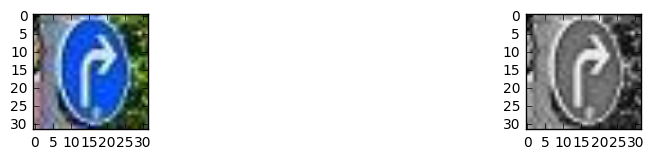

  SIGN: Right-of-way at the next intersection  PREDICTION: Right-of-way at the next intersection


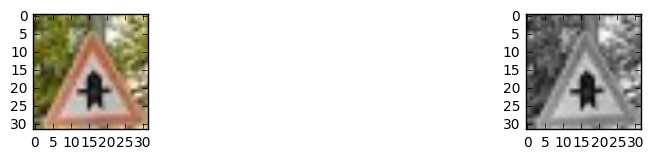

  SIGN: Go straight or left  PREDICTION: Go straight or left


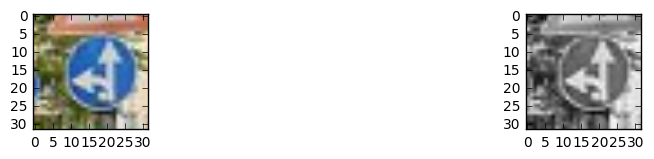

  SIGN: Slippery road  PREDICTION: Slippery road


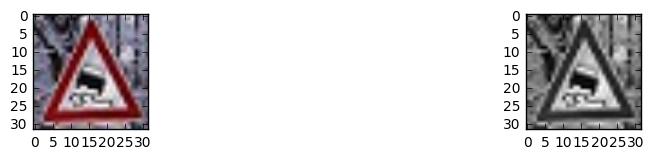

  SIGN: Slippery road  PREDICTION: Slippery road


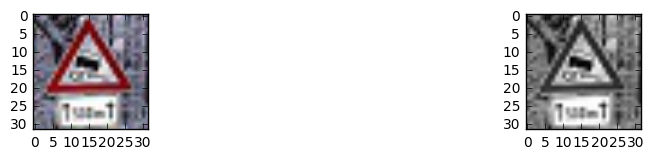

  SIGN: Priority road  PREDICTION: Priority road


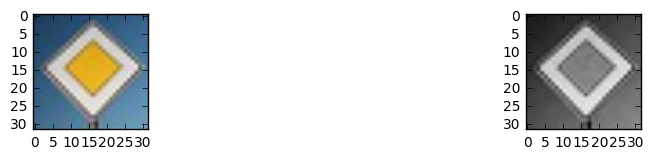

  SIGN: No vehicles  PREDICTION: No passing


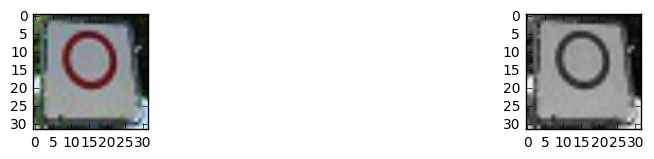

  SIGN: No vehicles  PREDICTION: No vehicles


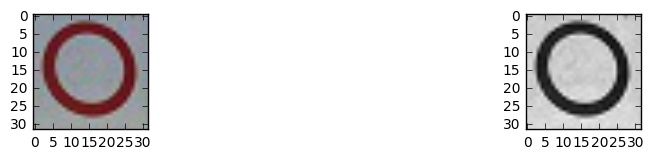

  SIGN: Speed limit (30km/h)  PREDICTION: Speed limit (30km/h)


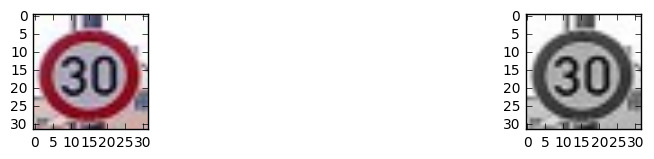

  SIGN: Speed limit (120km/h)  PREDICTION: Speed limit (120km/h)


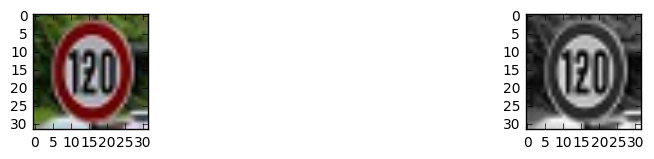

  SIGN: Speed limit (80km/h)  PREDICTION: Speed limit (80km/h)


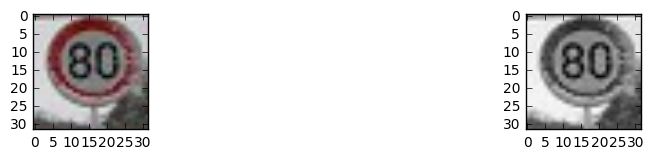

  SIGN: General caution  PREDICTION: General caution


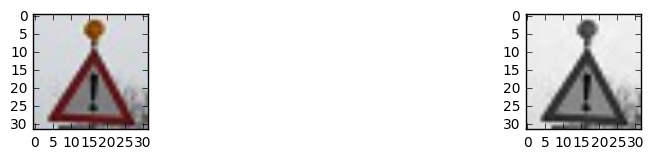

  SIGN: Children crossing  PREDICTION: Children crossing


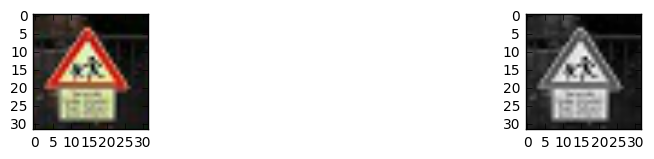

  SIGN: General caution  PREDICTION: General caution


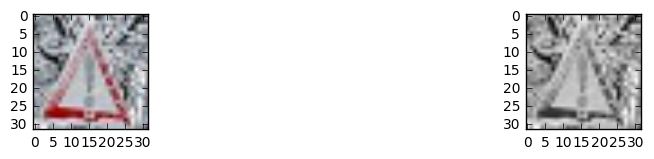

In [123]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import tensorflow as tf

print ()
print ('Sample pics prediction (right pic = original, left pic = used inside model')
print ()

# Run prediction on each pic
i = 0
for pics in newfeatures :
    # run predcition with trained model
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))    
        image = np.reshape(pics,(1,32,32,1))
        prediction = sess.run(tf.argmax(logits,1), feed_dict={x: image})
        # print prediction 
        print ('  SIGN:',sign_names[newlabels[i]] ,' PREDICTION:',sign_names[prediction[0]])
        # plot images
        plt.subplot(2,2,1)
        plt.imshow(pic_features[i])
        i = i + 1
        plt.subplot(2,2,2)
        ima= np.reshape(pics,(32,32))
        plt.imshow(ima,cmap = plt.get_cmap('gray'))
        plt.tight_layout()
        plt.show()


### Analyze Performance

#### D) Performance analysis about the 16 traffic sign images from the WWW vs. model (prediction vs. real)

(debug) Test accuracy = 0.939
(debug) New pics accuracy = 0.875
(debug) Prediction perf. analysis for new pics


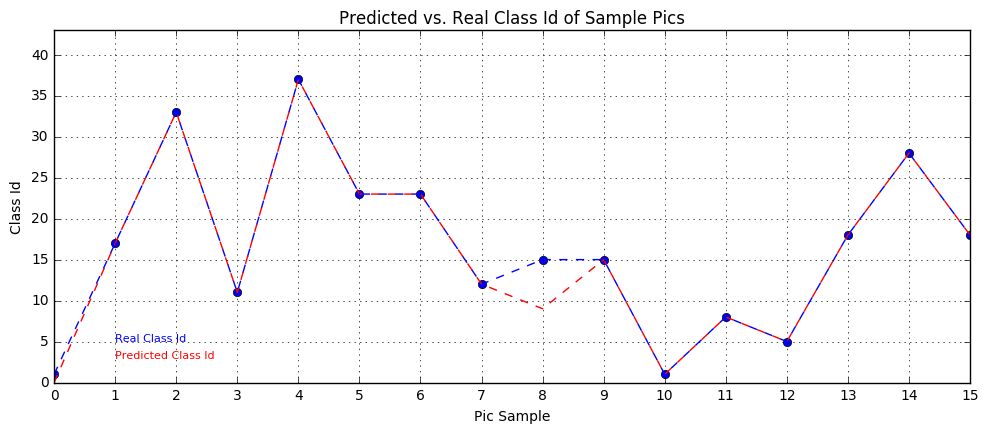

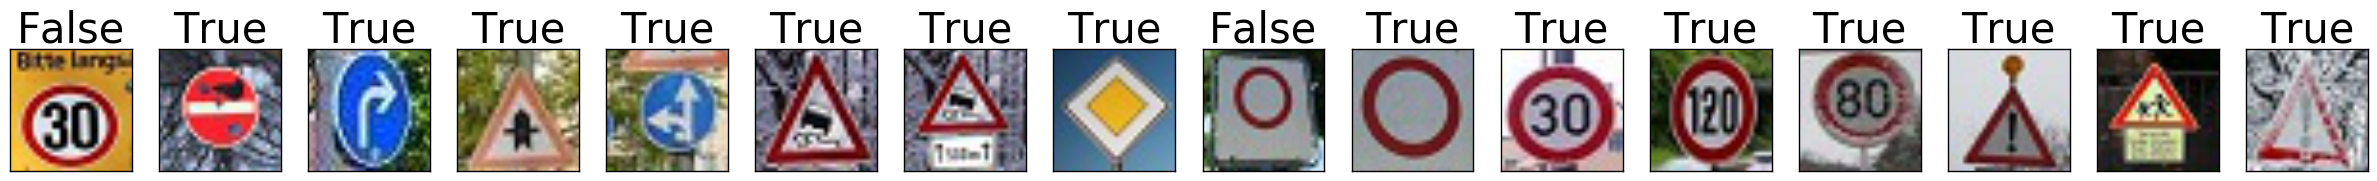

In [124]:
# run prediction and accuracy on 16 traffic sign images from the WWW
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # test accuracy on test-set
    test_accuracy = evaluate(x_test, y_test)
    print("(debug) Test accuracy = {:.3f}".format(test_accuracy))
    # accuracy analysis on 16 traffic signs from WWW
    test_accuracy = evaluate(newfeatures, newlabels)
    print("(debug) New pics accuracy = {:.3f}".format(test_accuracy))
    print("(debug) Prediction perf. analysis for new pics".format(test_accuracy))
    # performance analysis on 16 traffic signs from WWW
    hits       = sess.run(correct_prediction,  feed_dict={x: newfeatures, y: newlabels})
    prediction = sess.run(tf.argmax(logits,1), feed_dict={x: newfeatures})

# visualize accuracy & performance
# plot analysis vs. images
plt.figure(figsize=(26, 10))
plt.subplot(221)
plt.title('Predicted vs. Real Class Id of Sample Pics')
plt.plot(range(len(newlabels)), newlabels,  'bo')
plt.plot(range(len(newlabels)), newlabels,  'b--')
plt.text(1,5,'Real Class Id',color='blue',fontsize=8)
plt.text(1,3,'Predicted Class Id',color='red',fontsize=8)
plt.plot(range(len(newlabels)), prediction, 'r--')
plt.axis([0, len(newlabels)-1, 0, 43])
plt.xticks(np.arange(0, len(newlabels), 1))
plt.grid()
plt.xlabel('Pic Sample')
plt.ylabel('Class Id')
plt.show()

# plot images
i = 0
plt.figure(figsize=(24, 6))
for pics in pic_features :
    if (i>=len(newlabels)) :
        break
    sub = plt.subplot(4,16,i+1)
    sub.set_xticks(())
    sub.set_yticks(())
    plt.imshow(pics)
    plt.title(hits[i],fontsize=30)
    i = i + 1  
plt.tight_layout()
plt.show()
    

In [34]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

#### E) Analsis of top 5 probabilities of 16 traffic signs images from the WWW

Top 5 probabilities of the sample pics (first = original, second used @ model)

SIGN: Speed limit (30km/h)  RECOGNIZED: False
      top ( 1 ) 1.00000000000000000000 Speed limit (20km/h)
      top ( 2 ) 0.00000000000030439743 Speed limit (30km/h)
      top ( 3 ) 0.00000000000000034673 Speed limit (70km/h)
      top ( 4 ) 0.00000000000000000000 Speed limit (100km/h)
      top ( 5 ) 0.00000000000000000000 Children crossing


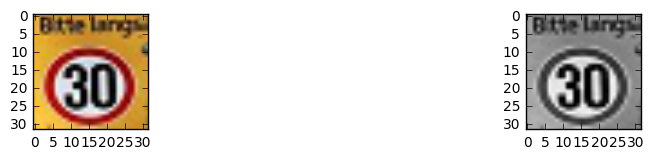

SIGN: No entry  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 No entry
      top ( 2 ) 0.00000000000000000000 Speed limit (20km/h)
      top ( 3 ) 0.00000000000000000000 Speed limit (30km/h)
      top ( 4 ) 0.00000000000000000000 Speed limit (50km/h)
      top ( 5 ) 0.00000000000000000000 Speed limit (60km/h)


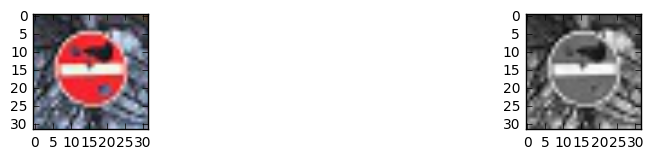

SIGN: Turn right ahead  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 Turn right ahead
      top ( 2 ) 0.00000000000000000000 Stop
      top ( 3 ) 0.00000000000000000000 Speed limit (20km/h)
      top ( 4 ) 0.00000000000000000000 Speed limit (30km/h)
      top ( 5 ) 0.00000000000000000000 Speed limit (50km/h)


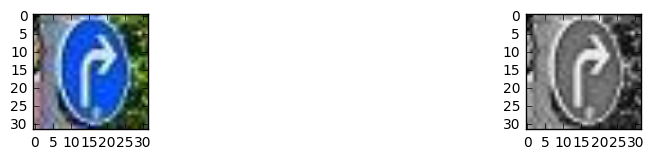

SIGN: Right-of-way at the next intersection  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 Right-of-way at the next intersection
      top ( 2 ) 0.00000000000000000000 Double curve
      top ( 3 ) 0.00000000000000000000 Speed limit (20km/h)
      top ( 4 ) 0.00000000000000000000 Speed limit (30km/h)
      top ( 5 ) 0.00000000000000000000 Speed limit (50km/h)


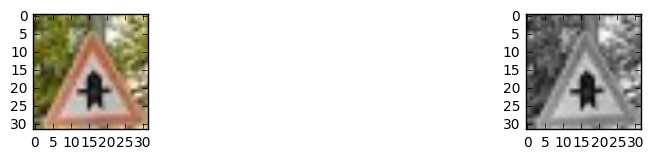

SIGN: Go straight or left  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 Go straight or left
      top ( 2 ) 0.00000000000000000127 Roundabout mandatory
      top ( 3 ) 0.00000000000000000000 Keep left
      top ( 4 ) 0.00000000000000000000 Slippery road
      top ( 5 ) 0.00000000000000000000 Beware of ice/snow


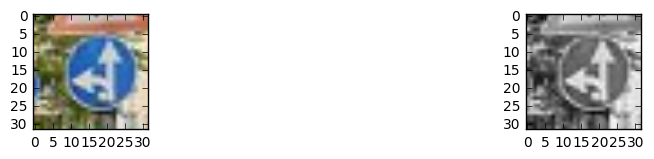

SIGN: Slippery road  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 Slippery road
      top ( 2 ) 0.00000000000000000000 Speed limit (20km/h)
      top ( 3 ) 0.00000000000000000000 Speed limit (30km/h)
      top ( 4 ) 0.00000000000000000000 Speed limit (50km/h)
      top ( 5 ) 0.00000000000000000000 Speed limit (60km/h)


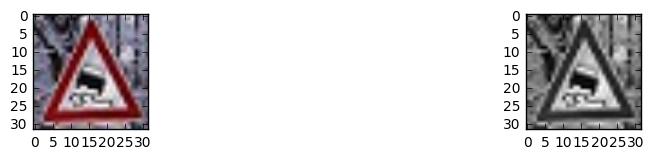

SIGN: Slippery road  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 Slippery road
      top ( 2 ) 0.00000000000000000000 Children crossing
      top ( 3 ) 0.00000000000000000000 Dangerous curve to the right
      top ( 4 ) 0.00000000000000000000 Road work
      top ( 5 ) 0.00000000000000000000 Speed limit (20km/h)


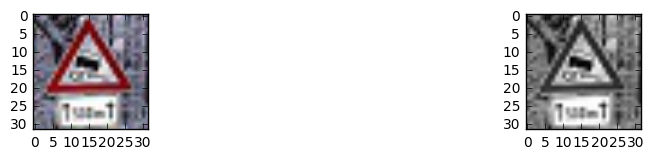

SIGN: Priority road  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 Priority road
      top ( 2 ) 0.00000000000000000000 Keep right
      top ( 3 ) 0.00000000000000000000 Roundabout mandatory
      top ( 4 ) 0.00000000000000000000 Speed limit (20km/h)
      top ( 5 ) 0.00000000000000000000 Speed limit (30km/h)


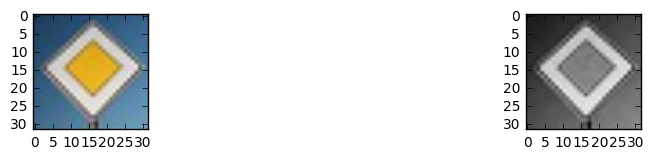

SIGN: No vehicles  RECOGNIZED: False
      top ( 1 ) 0.99998617172241210938 No passing
      top ( 2 ) 0.00001382658138027182 No vehicles
      top ( 3 ) 0.00000000000000000000 Yield
      top ( 4 ) 0.00000000000000000000 End of all speed and passing limits
      top ( 5 ) 0.00000000000000000000 Speed limit (20km/h)


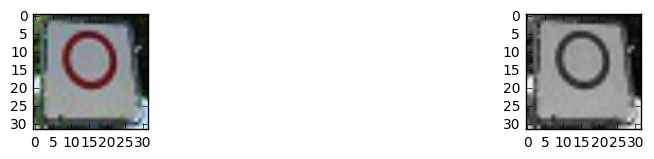

SIGN: No vehicles  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 No vehicles
      top ( 2 ) 0.00000000000000000000 Speed limit (20km/h)
      top ( 3 ) 0.00000000000000000000 Speed limit (30km/h)
      top ( 4 ) 0.00000000000000000000 Speed limit (50km/h)
      top ( 5 ) 0.00000000000000000000 Speed limit (60km/h)


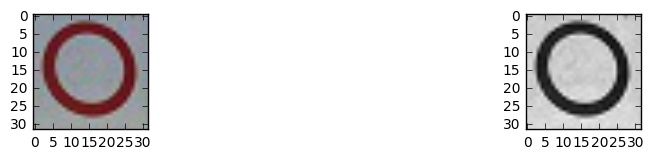

SIGN: Speed limit (30km/h)  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 Speed limit (30km/h)
      top ( 2 ) 0.00000000000000000000 Speed limit (20km/h)
      top ( 3 ) 0.00000000000000000000 Speed limit (50km/h)
      top ( 4 ) 0.00000000000000000000 Speed limit (60km/h)
      top ( 5 ) 0.00000000000000000000 Speed limit (70km/h)


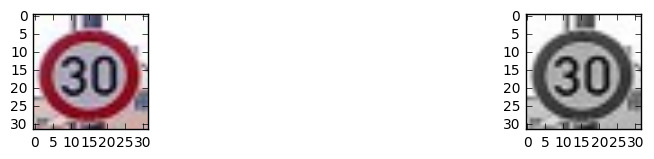

SIGN: Speed limit (120km/h)  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 Speed limit (120km/h)
      top ( 2 ) 0.00000000000000272581 Speed limit (100km/h)
      top ( 3 ) 0.00000000000000000000 Speed limit (20km/h)
      top ( 4 ) 0.00000000000000000000 Speed limit (30km/h)
      top ( 5 ) 0.00000000000000000000 Speed limit (50km/h)


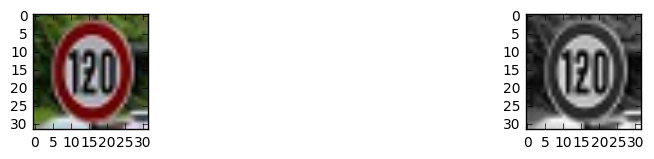

SIGN: Speed limit (80km/h)  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 Speed limit (80km/h)
      top ( 2 ) 0.00000000103185282541 Speed limit (50km/h)
      top ( 3 ) 0.00000000000000000294 Speed limit (30km/h)
      top ( 4 ) 0.00000000000000000011 Speed limit (100km/h)
      top ( 5 ) 0.00000000000000000000 Speed limit (60km/h)


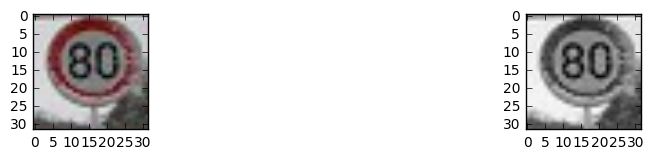

SIGN: General caution  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 General caution
      top ( 2 ) 0.00000000000000000728 Road work
      top ( 3 ) 0.00000000000000000000 Wild animals crossing
      top ( 4 ) 0.00000000000000000000 Traffic signals
      top ( 5 ) 0.00000000000000000000 Road narrows on the right


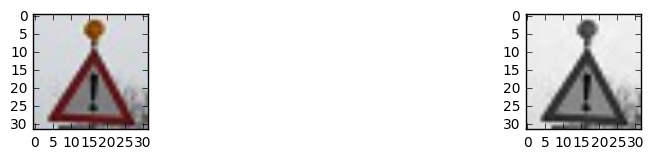

SIGN: Children crossing  RECOGNIZED: True
      top ( 1 ) 1.00000000000000000000 Children crossing
      top ( 2 ) 0.00000000000000000000 Bicycles crossing
      top ( 3 ) 0.00000000000000000000 Slippery road
      top ( 4 ) 0.00000000000000000000 Speed limit (20km/h)
      top ( 5 ) 0.00000000000000000000 Pedestrians


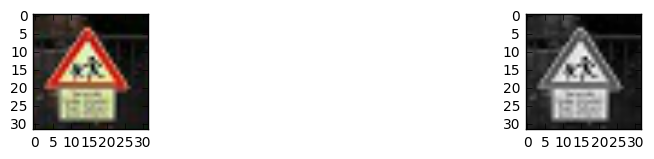

SIGN: General caution  RECOGNIZED: True
      top ( 1 ) 0.99999296665191650391 General caution
      top ( 2 ) 0.00000699463998898864 Traffic signals
      top ( 3 ) 0.00000000547620615521 Road narrows on the right
      top ( 4 ) 0.00000000011272024980 Bicycles crossing
      top ( 5 ) 0.00000000010384513388 Double curve


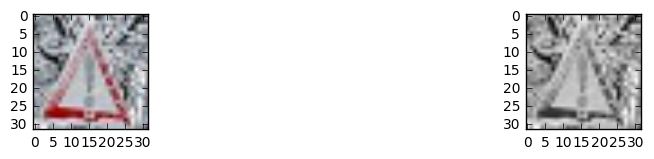

In [125]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

# run softmax func. on trained model for the 16 traffic signs from the WWW
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    soft_top5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5), feed_dict={x: newfeatures})
    print ('Top 5 probabilities of the sample pics (first = original, second used @ model)')
    print ()
   
# Plot analysis 
#sign_  = np.array(['123456789123456789123456789','123456789123456789123456789','123456789123456789123456789','123456789123456789123456789','123456789123456789123456789'])
#prop_  = np.array([0.0, 0.0, 0.0, 0.0, 0.0])


i = 0
for pics in pic_features :
    if (i>=len(newlabels)) :
        break
    
    print ('SIGN:',sign_names[newlabels[i]],' RECOGNIZED:',hits[i])
    
    for u in range(5) :
        print ('      top (',u+1,') {:.20f}'.format(soft_top5[0][i][u]), sign_names[soft_top5[1][i][u]])
        #prop_[u]  = soft_top5[0][i][u]
        #sign_[u]  = sign_names[soft_top5[1][i][u]]

    plt.subplot(2,2,1)
    plt.imshow(pics)
    plt.subplot(2,2,2)
    ima= np.reshape(newfeatures[i],(32,32))
    plt.imshow(ima,cmap = plt.get_cmap('gray'))

    #plt.subplot(2,2,3)
    #y_pos = np.arange(len(sign_))
    #plt.title('Top 5 Probabilities')
    #plt.barh(y_pos,prop_,align='center',)
    #plt.yticks(y_pos, sign_)
    #plt.xticks(prop_)
    #plt.xlabel(x_pos)
    #plt.xticks(())
    #plt.yticks(())
    #plt.xlabel('Probability')
                               
                        
    plt.tight_layout()
    plt.show()
    i = i + 1
     

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [126]:
## Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

#
# WARNING: changed function outputFeatureMap in order to adapt model structure
# + removed: image_input
# + changed code line: <old> activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
#                      <new> activation = tf_activation

#
# <old> def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
#

def outputFeatureMap(tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    # <old> activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    activation = tf_activation
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            

#### A) Select input image for featuremap analysis, display
Variable [image_id] specifies one image of 16 traffic sign images from the WWW


Input image for featuremaps plot (left = original, right = used inside model


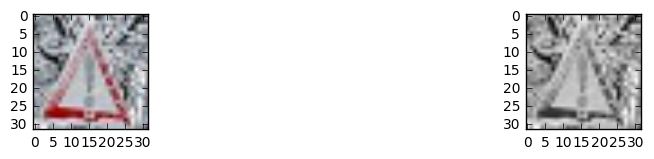

In [127]:
# Image-Featuremaps to display 
image_id = 15

print ()
print ('Input image for featuremaps plot (left = original, right = used inside model')

# Visualize input image
plt.subplot(2,2,1)
plt.imshow(pic_features[image_id])
plt.subplot(2,2,2)
im = np.reshape(newfeatures[image_id],(32,32))
plt.imshow(im,cmap = plt.get_cmap('gray'))
plt.tight_layout()
plt.show()

# Prepare image for featuremap display
image = newfeatures[image_id]
image = np.reshape(image,(1,32,32,1))

#### B) Display featuremaps of model
Following featuremaps are displayed:
* conv1 with and without pooling
* conv2 with and without pooling
* 2nd pooling of conv1 which is feed fully connected network fc1 (multi-scale)   


Featuremap of conv1 network 30x30x15:


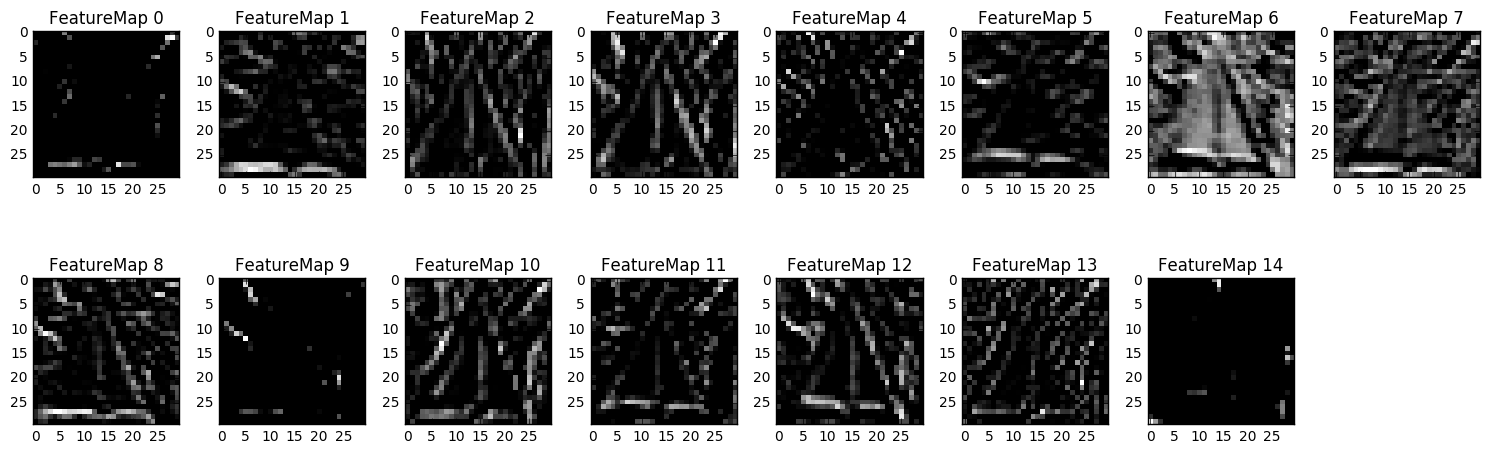


Featuremap of conv1 network after pooling 15x15x15:


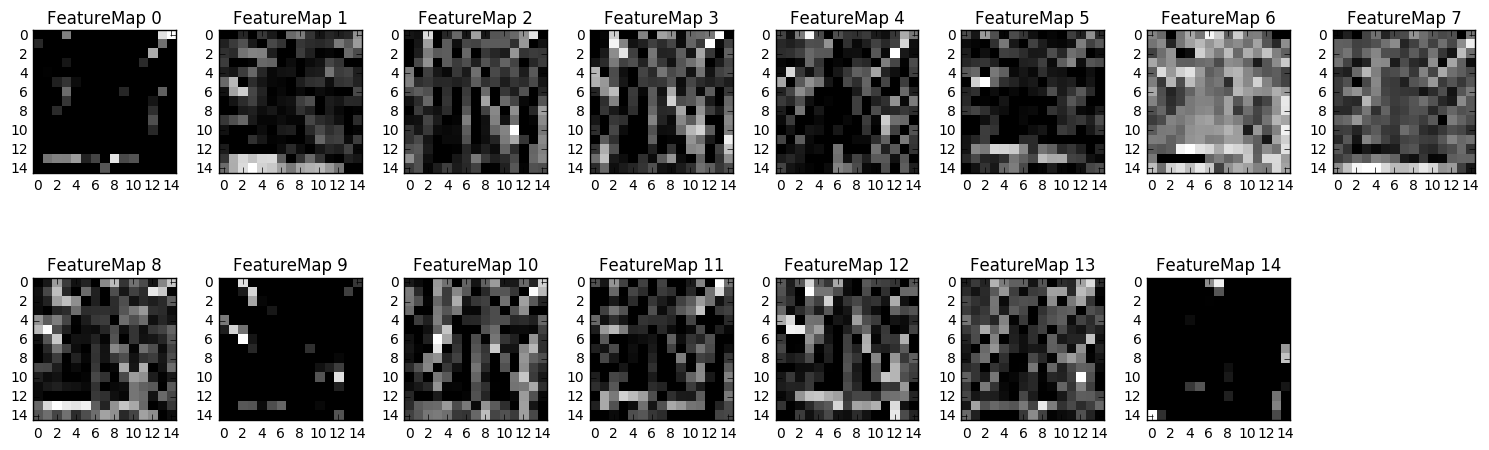


Featuremap of conv2 network 11x11x16:


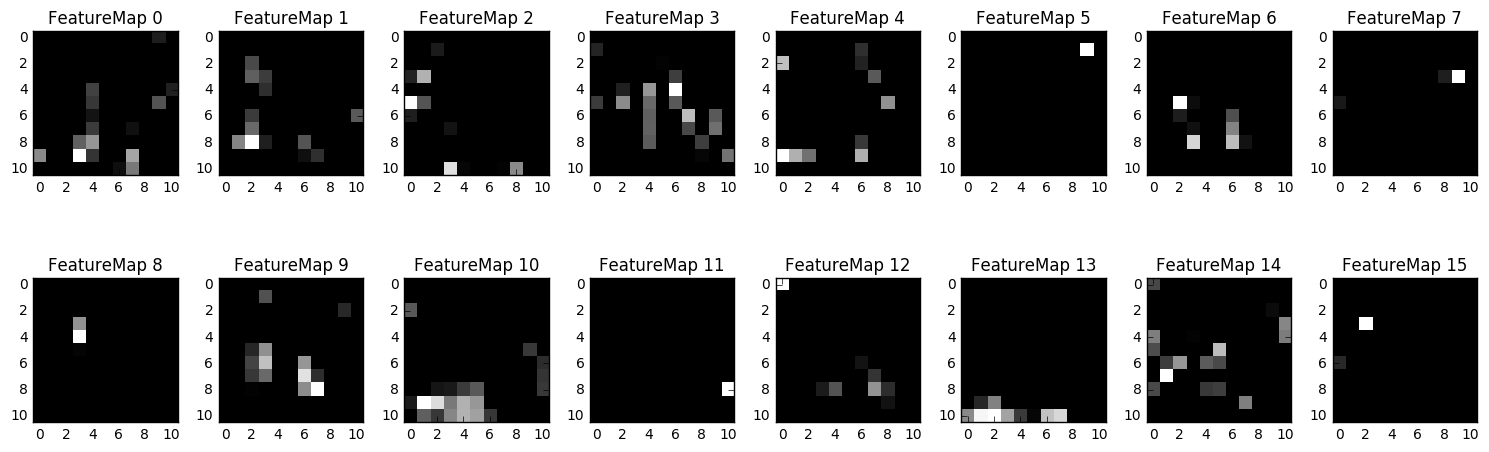


Featuremap of conv2 network 5x5x16:


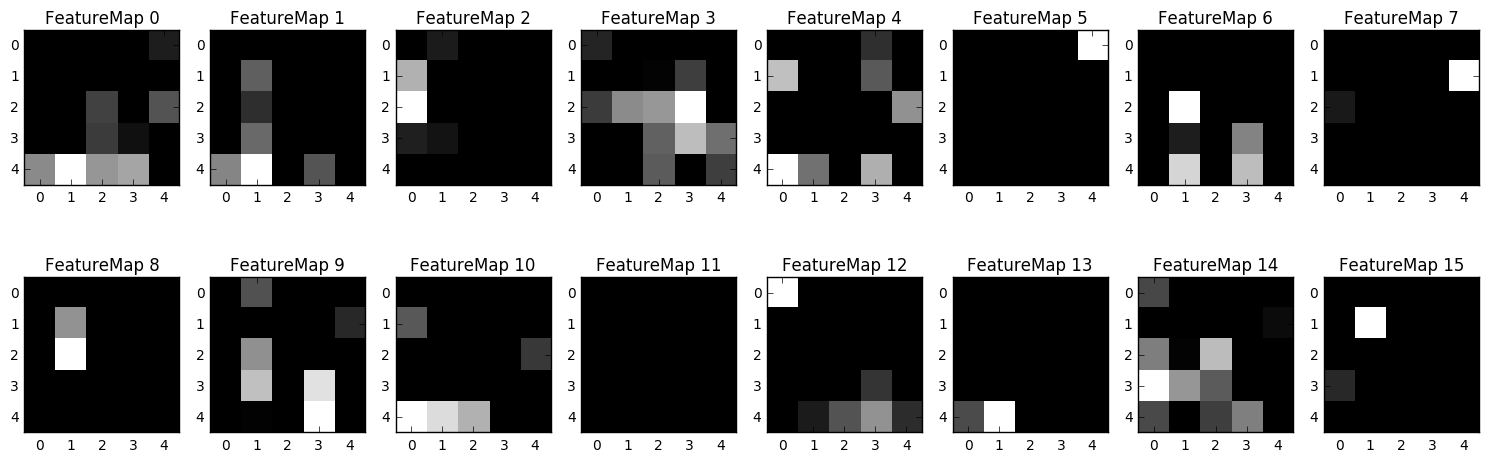


Featuremap of conv1 network after 2. pooling 7x7x15 (feed to fc0):


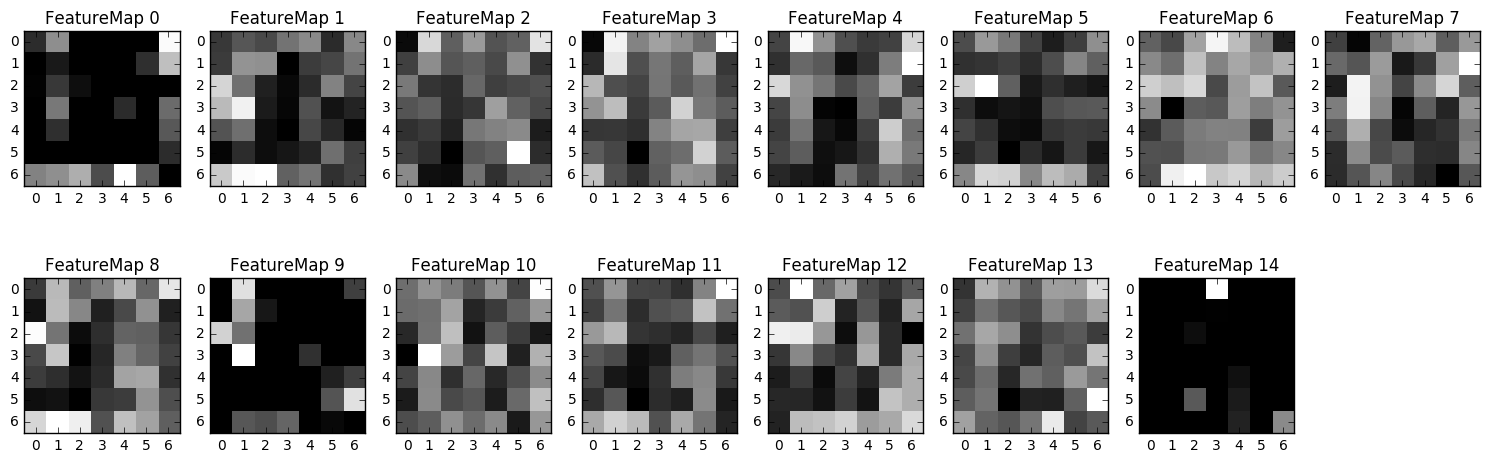

In [128]:
# Feature map visualization
with tf.Session() as sess:
    # restore session
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # Visualize featuremap of conv1
    print ()
    print ("Featuremap of conv1 network 30x30x15:")
    conv1_ = sess.run(conv1_act, feed_dict={x: image})
    outputFeatureMap(conv1_)
    plt.tight_layout()
    plt.show()
    
    print ()
    print ("Featuremap of conv1 network after pooling 15x15x15:")
    conv1_sub_ = sess.run(conv1_sub, feed_dict={x: image})
    outputFeatureMap(conv1_sub_)
    plt.tight_layout()
    plt.show()
    
    # Visualize featuremap of conv2
    print ()
    print ("Featuremap of conv2 network 11x11x16:")
    conv2_ = sess.run(conv2_act, feed_dict={x: image})
    outputFeatureMap(conv2_)
    plt.tight_layout()
    plt.show()
    
    print ()
    print ("Featuremap of conv2 network 5x5x16:")
    conv2_sub_ = sess.run(conv2_sub, feed_dict={x: image})
    outputFeatureMap(conv2_sub_)
    plt.tight_layout()
    plt.show()
    
    print ()
    print ("Featuremap of conv1 network after 2. pooling 7x7x15 (feed to fc0):")
    fc0_conv1_sub_ = sess.run(fc0_conv1_sub, feed_dict={x: image})
    outputFeatureMap(fc0_conv1_sub_)
    plt.tight_layout()
    plt.show()